# WiDS DATATHON WORKSHOP
## FEBRUARY 12th, 2018
<img src="images/inst_logos.png" alt="Harvard IACS" style="height: 80px;" align="left"/>

### INSTRUCTORS: 
- **Anastasiya Belyaeva (MIT)**
- **Weiwei Pan (Harvard IACS)**

### SET-UP INSTRUCTIONS:
**I. Workshop WiFi Access**

- WiFi network: 
- WiFi access code:
  
**II. Workshop Materials & Computing**

All workshop data, slides, `ipython` notebooks are available on the Workshop Canvas site.
1. **Go to the workshop Canvas site:** *https://canvas.harvard.edu*
2. **Login using XID:** *(see check-in slip)*
3. **Login using password:** *(see check-in slip)*
4. **Choose the course titled:** *WiDS Datathon Workshop* 
5. **For workshop materials:** *select 'Modules'*
6. **For computing:** *select 'JupyterHub', following instructions to start a notebook server through the Harvard SEAS JupyterHub*

# KAGGLE COMPETITION

* Hands-on experience with data science and machine learning
* You only learn by doing!
* Register yourself on [Kaggle](https://www.kaggle.com/)
* Fill out Name, Location (both city and country) and Occupation so that you can win prizes in the state of Massachusetts
* **February 15, 2018** - Entry deadline. You must accept the competition rules by this date in order to compete.
* **February 15, 2018** - Team Merger deadline. This is the last day competitors may join or merge teams.
* **February 28, 2018** - Final submission deadline
* Note the submission instructions and how you will be evaluated

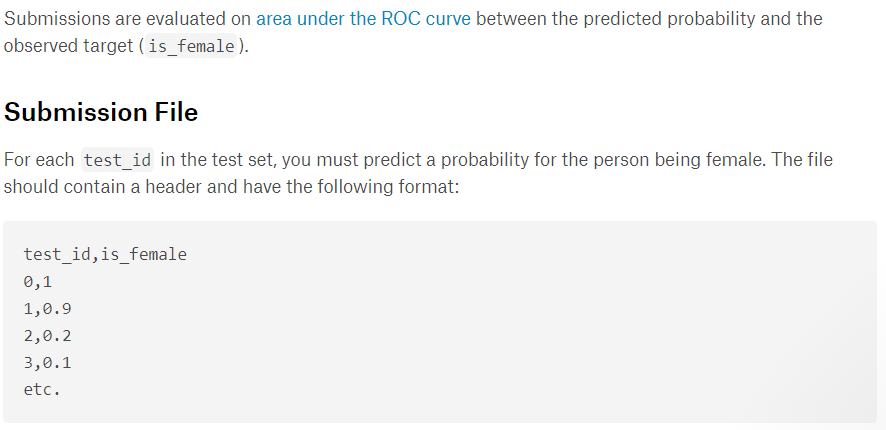

In [194]:
Image(filename='images/submission.PNG', width = 900, height = 500)

# Winning strategies
* Feature engineering - creating variables that might correlate well with the target
* Testing many hypotheses for feature engineering
* Model choice: ensembles of different models
* Save predictions from all of your models to build an ensemble of models later
* [Take a look at past solutions](https://www.hackerearth.com/practice/machine-learning/advanced-techniques/winning-tips-machine-learning-competitions-kazanova-current-kaggle-3/tutorial/)

# Dataset - Hubway Bike Rentals
* Bike trips taken with variety of metrics collected on the trip
* Questions that the data can answer:
  * Where do Hubway users ride? 
  * When do they ride? 
  * How far do they go? 
  * Which stations are most popular? 
  * On what days of the week are most rides taken? 
  * How do user patterns differ between members and casual riders? 

In [2]:
%matplotlib inline
import matplotlib
import pandas as pd # package for data analysis, reading in the data, summarizing data, manipulating data
import numpy as np # package for math operations
import matplotlib.pyplot as plt # package for plotting
from IPython.display import Image
from sklearn import preprocessing, neighbors

# DATA EXPLORATION

# First look at the data

* Read in raw data - we will be using [Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) package to make a DataFrame
* What are the attributes of the data?
* Summary statistics

In [6]:
hubway_data = pd.read_csv('hubway_trips.csv') # read in the data as a DataFrame
hubway_data.head() # shows the first couple of rows of the dataset

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


What is the dimensionality of our dataset (number of rows, number of columns)?

In [196]:
print(hubway_data.shape) # what is the dimensionality of our dataset (number of rows, number of columns)

(1579025, 13)


Summary statistics for our dataset for both numerical and categorical variables:

In [197]:
hubway_data.describe(include = 'all') # get counts and summary statistics for the data (include is to show results for numerical and categorical data)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
count,1.579025e+06,1.579025e+06,1579025,1.579025e+06,1579025,1.579011e+06,1579025,1.578980e+06,1578559,1579025,1106259,350644.000000,1106414
unique,NaN,NaN,1,NaN,521432,NaN,515102,NaN,1163,2,530,NaN,2
top,NaN,NaN,Closed,NaN,7/30/2013 17:18:00,NaN,10/19/2013 16:26:00,NaN,B00490,Registered,'02118,NaN,Male
freq,NaN,NaN,1579025,NaN,25,NaN,27,NaN,2138,1106414,121749,NaN,834714
mean,7.895130e+05,8.865317e+05,NaN,1.200280e+03,NaN,5.438039e+01,NaN,5.425603e+01,NaN,NaN,NaN,1976.295322,NaN
std,4.558254e+05,5.064783e+05,NaN,2.653539e+04,NaN,3.364295e+01,NaN,3.347219e+01,NaN,NaN,NaN,10.999742,NaN
min,1.000000e+00,8.000000e+00,NaN,-6.900000e+03,NaN,3.000000e+00,NaN,3.000000e+00,NaN,NaN,NaN,1932.000000,NaN
25%,3.947570e+05,4.465250e+05,NaN,4.120000e+02,NaN,2.700000e+01,NaN,2.900000e+01,NaN,NaN,NaN,1969.000000,NaN
50%,7.895130e+05,8.950440e+05,NaN,6.600000e+02,NaN,4.800000e+01,NaN,4.800000e+01,NaN,NaN,NaN,1979.000000,NaN
75%,1.184269e+06,1.328083e+06,NaN,1.082000e+03,NaN,7.400000e+01,NaN,7.400000e+01,NaN,NaN,NaN,1985.000000,NaN


# Selecting and Filtering Data
* Select columns you are interested in

In [198]:
columns_you_want = ['start_date', 'end_date'] # specify columns you're interested in
chosen_columns = hubway_data[columns_you_want] # select the columns
chosen_columns.head() # show first couple of lines of this new variable 

,start_date,end_date
0,7/28/2011 10:12:00,7/28/2011 10:12:00
1,7/28/2011 10:21:00,7/28/2011 10:25:00
2,7/28/2011 10:33:00,7/28/2011 10:34:00
3,7/28/2011 10:35:00,7/28/2011 10:36:00
4,7/28/2011 10:37:00,7/28/2011 10:37:00


Filter the data - let's get the data of all the millennials

In [199]:
millennials = hubway_data[hubway_data.birth_date > 1982] # select the birth_date column and only take entries that are larger than year 1982
millennials.head() # display first couple of lines

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female
8,9,16,Closed,8,7/28/2011 11:01:00,23.0,7/28/2011 11:01:00,23.0,B00554,Registered,'97214,1983.0,Female
9,10,17,Closed,1108,7/28/2011 11:55:00,47.0,7/28/2011 12:13:00,40.0,B00550,Registered,'01867,1994.0,Male
18,19,31,Closed,1020,7/28/2011 12:01:00,38.0,7/28/2011 12:18:00,36.0,B00147,Registered,'02118,1987.0,Female
19,20,33,Closed,1264,7/28/2011 12:01:00,38.0,7/28/2011 12:22:00,44.0,B00165,Registered,'02139,1985.0,Female


# Split Data by Groups
* [Split](https://pandas.pydata.org/pandas-docs/stable/groupby.html) bike trips by type of user (registered vs. casual)
* Are the bike trips between registered and casual users different in duration?

In [200]:
grouped_data = hubway_data.groupby('subsc_type') # split data
grouped_data.mean()['duration'] # calculate the mean for the variable duration

subsc_type
Casual        2293.442214
Registered     733.328984
Name: duration, dtype: float64

# Applying a Function
* Apply a function to a column of a DataFrame
* Let's transform start date to get a year when the bike was checked out

In [239]:
def get_age(x):
    """
    Calculate the age of the user.
    x : birth date and start date in that order
    """
    birthdate = x[0]
    startdate = x[1]
    # start date comes in the form of "7/28/2011 10:12:00"
    # get just the year digits
    check_out_year = int(startdate[-13:-9])
    age = check_out_year - birthdate
    return age

In [240]:
hubway_data['age'] = hubway_data[['birth_date', 'start_date']].apply(get_age, axis=1)
hubway_data['age'].head()

0    35.0
1    45.0
2    68.0
3    30.0
4    28.0
Name: age, dtype: float64

# Join data from another dataset 
* Location (latitude and longitude) corresponsing to each bike station
* DataFrame.join is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame

In [203]:
station_data = pd.read_csv('hubway_stations.csv')[['id', 'lat', 'lng']]
station_data.head()

,id,lat,lng
0,3,42.340021,-71.100812
1,4,42.345392,-71.069616
2,5,42.341814,-71.090179
3,6,42.361285,-71.065140
4,7,42.353412,-71.044624


In [204]:
hubway_data_with_gps = hubway_data.join(station_data.set_index('id'), on='strt_statn')
hubway_data_with_gps.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,age,lat,lng
0,1,8,Closed,9,7/28/2011 10:12:00,23,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,35.0,42.359677,-71.059364
1,2,9,Closed,220,7/28/2011 10:21:00,23,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,45.0,42.359677,-71.059364
2,3,10,Closed,56,7/28/2011 10:33:00,23,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,68.0,42.359677,-71.059364
3,4,11,Closed,64,7/28/2011 10:35:00,23,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,30.0,42.359677,-71.059364
4,5,12,Closed,12,7/28/2011 10:37:00,23,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,28.0,42.359677,-71.059364


# DATA VISUALIZATION
* identify hidden patterns and trends
* formulate hypothesis
* determine best steps for modeling
* communicate results

Let's explore users that only ride for a relatively short amount of time (less than 2 hours). We will also remove trips where some information about the trip is missing using [dropna() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) to make plotting easier.

In [205]:
short_distance_trips = hubway_data[hubway_data.duration < 7200].dropna()
short_distance_trips.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,age
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,35.0
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,45.0
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,68.0
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,30.0
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,28.0


* Scatter plots - numerical data - useful for exploring correlations in data
* Age vs. duration of bike trip 

Text(0,0.5,'Duration (in seconds)')

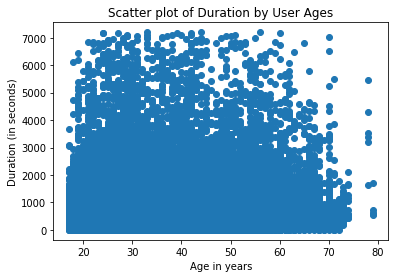

In [206]:
plt.scatter(short_distance_trips['age'], short_distance_trips['duration'])
plt.title('Scatter plot of Duration by User Ages')
plt.xlabel('Age in years')
plt.ylabel('Duration (in seconds)')

* Histograms - distribution of the variable
* Useful for identifying outliers, multi-modality

Text(0.5,1,'Histogram of User Age')

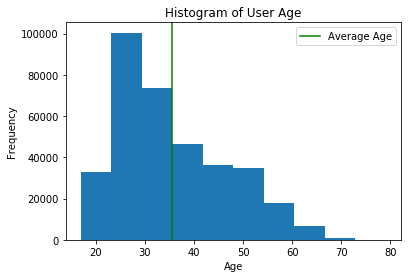

In [207]:
plt.hist(short_distance_trips['age'], bins = 10)
plt.axvline(short_distance_trips['age'].mean(), color='green', label='Average Age')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of User Age')

* Bar plot - useful for categorical data
* Let's [obtain counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) of number of users by gender and plot them

In [208]:
gender_counts = short_distance_trips['gender'].value_counts()
gender_counts

Male      262841
Female     86684
Name: gender, dtype: int64

Text(0.5,1,'Users by Gender')

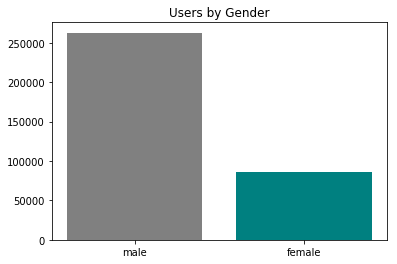

In [281]:
plt.bar(range(2), gender_counts, align='center', color=['gray', 'teal'])
plt.xticks([0, 1], ['male', 'female'])
plt.title('Users by Gender')

# DATA CLEANING
* Wrong values
* Messy format
* Too many observations - do preliminary analysis on a subset of data
* Missing data
* Drop samples with problematic values
* Use mean, median or most common value of the feature
* Use a model to estimate the value
* Data might not be missing at random

# Dropping missing values

In [210]:
hubway_data_droppped = hubway_data.dropna()

# Dropping wrong values
* Explore outliers using histograms
* Trip duration should be a positive number
* Trip duration cannot be too long

Text(0,0.5,'Frequency')

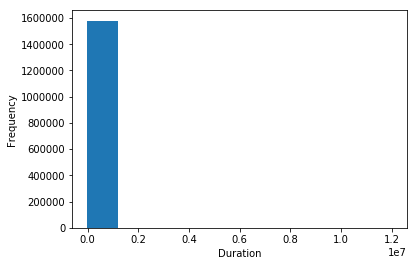

In [211]:
plt.hist(hubway_data.duration.dropna())
plt.xlabel('Duration')
plt.ylabel('Frequency')

In [212]:
print('Minimum duration = ', np.min(hubway_data.duration))
print('Maximum duration = ', np.max(hubway_data.duration))

Minimum duration =  -6900
Maximum duration =  11994458


Currently the maximum trip duration is 11994458 seconds, which is approximately 138 days. Something must have gone wrong during the data recording process. The minimum trip duration is a negative value, which cannot occur. 
Let's filter data by duration:
* Trip duration has to be positive and probably less than 8 hours (28800 seconds)

In [213]:
hubway_data_clean = hubway_data[(hubway_data.duration > 0) & (hubway_data.duration < 28800)] 
hubway_data_clean.shape

(1571813, 14)

We can check the histogram for duraton of our filtered dataset

Text(0,0.5,'Frequency')

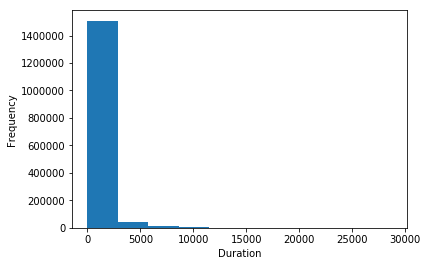

In [214]:
plt.hist(hubway_data_clean.duration.dropna())
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Filling in missing data with summary statistics
* Impute missing data by replacing it with mean, median or the most frequent value
* Most frequent value could be a good choice for categorical data
* Imputation reduces variability within the dataset, which will impact your model's performance
* Evaluate which imputation technique gives the best perfomance
* Let's impute user's age and trip duration using the most frequent value
* We will specify the parameters for the [imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)
* Fit the imputer (find most frequent value in this case) and transform the data accordingly

In [215]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent') # specify the imputer
hubway_data[['age', 'duration']] = imp.fit_transform(hubway_data[['age', 'duration']]) # fit the imputer and transform the input

# Filling in missing data with k-nearest neighbors (k-NN)
* Fit a model to the data that is not missing
* Use the model to predict the values for missing data
* k-NN finds $k$ samples closest in distance to the missing point and predicts the label from these closest points
* k-NN classification: output is a category decided by majority vote of its $k$ neighbors
* k-NN regression: output is the average of the values of its $k$ nearest neighbors
* Weigh contribution of each point can be weighted by its distance from the point of interest
* Distance metric matters, number of neighbors matters
* Pick parameters that give you best performance on the final task

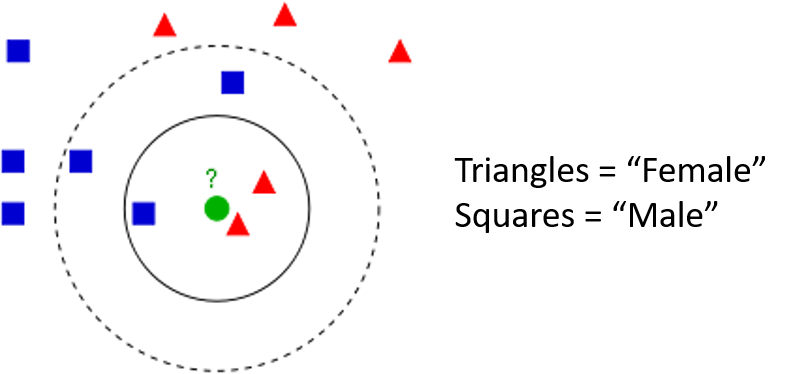

In [5]:
Image(filename='images/knn.png', width= 500, height= 300)

We will use the duration column to impute missing birth dates.

In [271]:
model = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')
model.fit(hubway_data_droppped[['duration']], hubway_data_droppped[['birth_date']])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [276]:
missing_birth_dates = hubway_data[pd.isnull(hubway_data['birth_date'])]['duration']
imputed_birthdates = model.predict(missing_birth_dates.values.reshape(-1, 1))

Text(0,0.5,'Frequency')

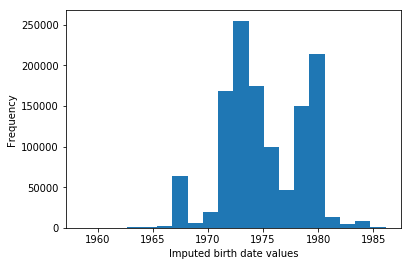

In [279]:
plt.hist(imputed_birthdates, bins = 20)
plt.xlabel('Imputed birth date values')
plt.ylabel('Frequency')

# FEATURE ENGINEERING
* What is the question you are trying to answer
* Creating new features that might correlate well with your prediction target
* How to transform categorical data (male vs. female) to numerical

# Example: classify whether a trip was taken by a casual or registered user
* What features might distinguish casual vs. registered users
* Registered users probably use the bike on the regular basis to for example, to get to work
* Registered users are likely using bikes around 9am and 5pm to get to and from work
* Casual users might be more likely to rent a bike for city exploring, which might be in the afternoon
* Let's engineer a create a new feature - the hour the bike was checked out

In [216]:
def get_check_out_hours(s):
    """
    Return the hour the bike was checked out.
    s : date in form of 7/28/2011 10:12:00 or 11/30/2013 23:32:00
    """
    # get just the hour digits
    return int(s[-8:-6])

Text(0.5,1,'Time of Day vs Checkouts')

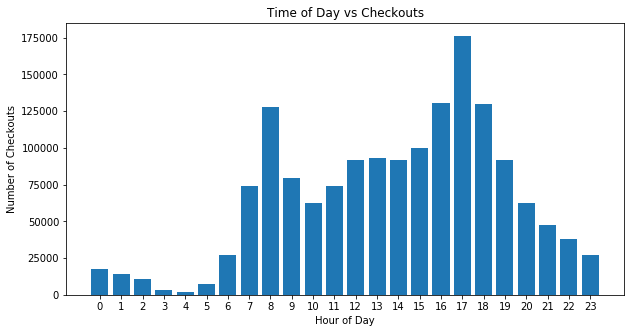

In [217]:
hubway_data['check_out_hour'] = hubway_data['start_date'].apply(get_check_out_hours)
plt.figure(figsize=(10, 5))
check_out_counts = hubway_data['check_out_hour'].dropna().value_counts()
plt.bar(range(0,24), check_out_counts.loc[range(0,24)])
plt.xticks(range(24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Checkouts')
plt.title('Time of Day vs Checkouts')

Let's check our hypothesis by splitting the data into trips by subscription type, counting the number of checkouts corresponding to each hour and plotting a bar chart.

In [218]:
grouped = hubway_data.groupby('subsc_type') # split data by subscription type
counts_by_group = grouped['check_out_hour'].value_counts()

Text(0.5,1,'Time of Day vs Checkouts')

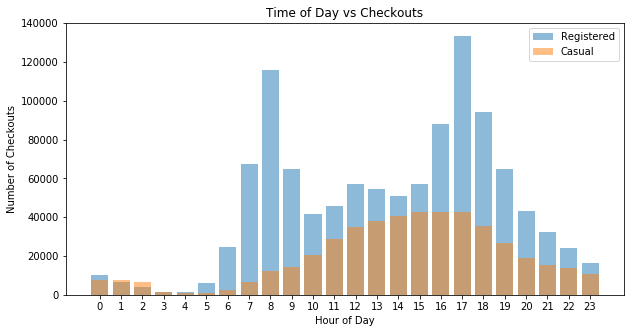

In [219]:
plt.figure(figsize=(10, 5))
plt.bar(range(0,24), counts_by_group['Registered'].loc[range(0,24)], alpha = 0.5, label = 'Registered')
plt.bar(range(0,24), counts_by_group['Casual'].loc[range(0,24)], alpha = 0.5, label = 'Casual')
plt.xticks(range(24))
plt.legend()
plt.xlabel('Hour of Day')
plt.ylabel('Number of Checkouts')
plt.title('Time of Day vs Checkouts')

# One-hot encoding
* One-hot encoding is a representation of categorical variables as binary vectors
* Could use integers to denote different categories
* However categories will then be ordered, which is often not desired
* Solution: one-hot encoding

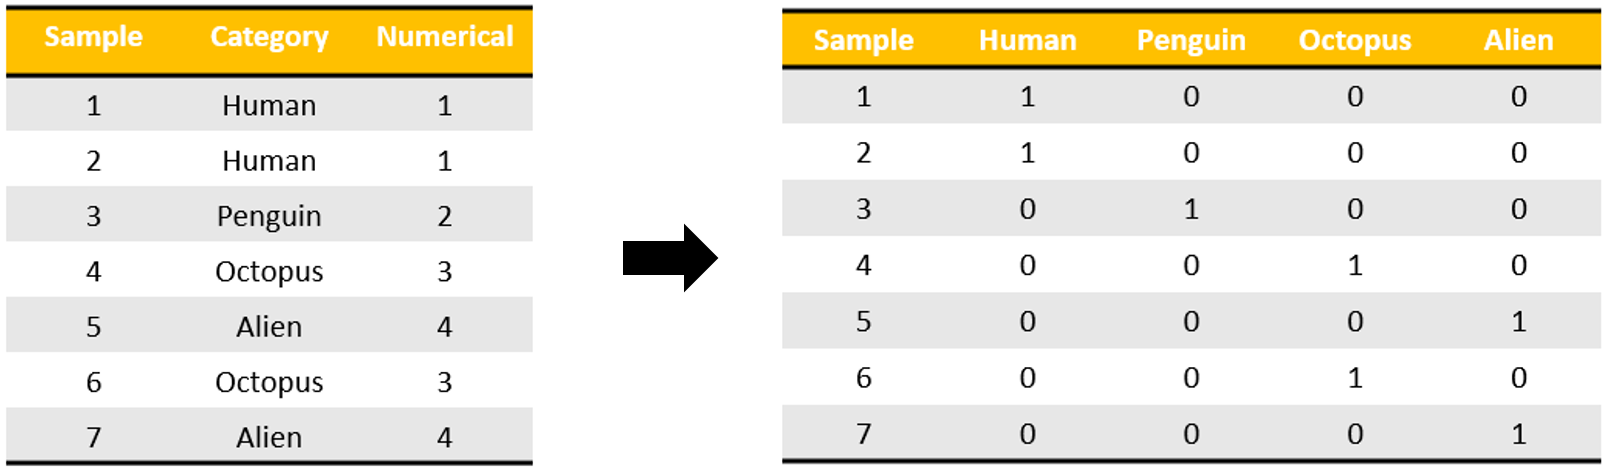

In [220]:
Image(filename='images/onehot.png', width = 900, height = 500)

Let's see how one-hot encoding works on the gender variable. First we will transform the categories "Male", "Female" and "NaN" to integers 0, 1, 2. Usually one would either impute or remove missing values, however in some cases the pattern of missing values might give you valuable insights and thus you can treat them as a separate category. The pattern of missing values for gender is probably not meaningful in this case, but for the sake of example, we will treat "NaN"s as another category.

In [7]:
hubway_data['gender'] = hubway_data['gender'].fillna('None') # replace nans by another name so that python doesn't recognize it as a nan
le = preprocessing.LabelEncoder() # specify paramets for encoder
hubway_data['gender'] = le.fit_transform(hubway_data['gender']) # fit the model and transform the gender variable
hubway_data.tail() # number in paranthesis specifies the numbers of lines to show

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
1579020,1579021,1748018,Closed,720,11/30/2013 23:30:00,130.0,11/30/2013 23:42:00,90.0,T01341,Registered,'02141,NaN,1
1579021,1579022,1748019,Closed,480,11/30/2013 23:32:00,67.0,11/30/2013 23:40:00,88.0,T01328,Registered,'02143,NaN,1
1579022,1579023,1748020,Closed,540,11/30/2013 23:32:00,137.0,11/30/2013 23:41:00,133.0,T01310,Casual,NaN,NaN,2
1579023,1579024,1748021,Closed,120,11/30/2013 23:36:00,76.0,11/30/2013 23:38:00,68.0,B01478,Registered,'02141,NaN,1
1579024,1579025,1748022,Closed,420,11/30/2013 23:39:00,68.0,11/30/2013 23:46:00,95.0,T01352,Registered,'02143,NaN,0


Now we will encode integer categories 0, 1, and 2 as one-hot vectors.

In [222]:
enc = preprocessing.OneHotEncoder()
new_columns = enc.fit_transform(hubway_data['gender'].values.reshape(-1, 1)).toarray()
hubway_data[['g1', 'g2', 'g3']] = pd.DataFrame(new_columns, index = hubway_data.index)
hubway_data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,age,check_out_hour,g1,g2,g3
0,1,8,Closed,9.0,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,1,35.0,10,0.0,1.0,0.0
1,2,9,Closed,220.0,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,1,45.0,10,0.0,1.0,0.0
2,3,10,Closed,56.0,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,1,68.0,10,0.0,1.0,0.0
3,4,11,Closed,64.0,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,0,30.0,10,1.0,0.0,0.0
4,5,12,Closed,12.0,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,0,28.0,10,1.0,0.0,0.0


# FEATURE NORMALIZATION
* Range of values for each feature might vary dramatically
* Often in machine learning it is critical to rescale or standardize features before fitting a model
* Example: if a classifier is computing a distance between two points
    * If one of the features has a broad range of values, the distance will be dominated by this particular feature
    * Normalize each feature to be within the same range so that each feature contributes approximately proportionately to the final distance
* Some algorithms such as gradient descent converge much faster with feature normalization
* Standardization $$x_{new} = \frac{x - \bar{x}}{\sigma}$$
* Rescaling $$x_{new} = \frac{x - \min(x)}{\max(x) - \min(x)}$$

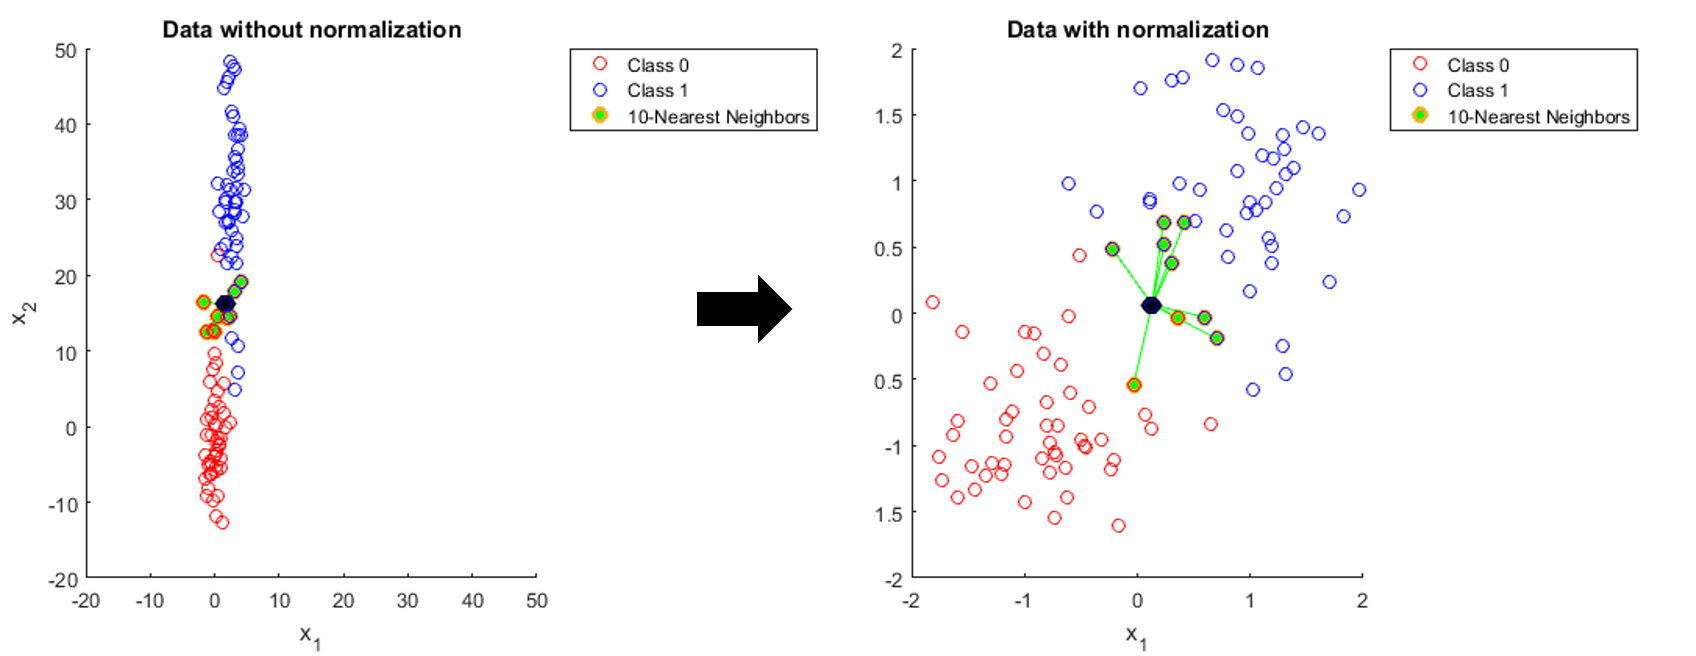

In [186]:
Image(filename='images/rescaling.png', width = 900, height = 500)

Let's standardize the duration, birth date and age variables

In [188]:
x = hubway_data[['duration', 'birth_date', 'age', 'check_out_hour']]
hubway_data[['duration', 'birth_date', 'age', 'check_out_hour']] = (x - np.mean(x))/np.std(x)
hubway_data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,age,check_out_hour,g1,g2,g3
0,1,8,Closed,-0.044894,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,-0.026848,1,0.781431,-0.784748,0.0,1.0,0.0
1,2,9,Closed,-0.036942,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,-0.935962,1,2.494727,-0.784748,0.0,1.0,0.0
2,3,10,Closed,-0.043123,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,-3.026923,1,6.435310,-0.784748,0.0,1.0,0.0
3,4,11,Closed,-0.042821,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,0.427709,0,-0.075218,-0.784748,1.0,0.0,0.0
4,5,12,Closed,-0.044781,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,0.609531,0,-0.417877,-0.784748,1.0,0.0,0.0


# Exercise: Now it's your turn!!!
1. On [canvas.harvard.edu](canvas.harvard.edu) select 'Modules' 
2. Go to exercise section
3. Download the 'wids_workshop_exercise.ipynb', 'hubway_trips.csv', and 'hubway_stations.csv'
4. On [canvas.harvard.edu](canvas.harvard.edu), click 'JupyterHub' and wait for the server to start up
5. Upload the files above to the server
2. Open up wids_workshop_exercise.ipynb and complete the code

# [Haversine distance](https://en.wikipedia.org/wiki/Haversine_formula)

In [28]:
Image(url='http://giventocode.com/Media/Default/Windows-Live-Writer/Geotag-your-Entities-using-Azure-Mobile-_FFE5/image_4.png', width = 200, height = 200)